

# E-Commerce: Product Range Analysis
    
## Project description :

Company XYZ have contacted with our data consulting firm.To boost their sales and targeting customers, they are interested to do a product range analysis.They want to see some KPI , such as revenue, average check, and ARPPU.



# Description of the data :
    
The dataset contains the transaction history of an online store that sells household goods.

The file 'ecommerce_dataset_us.csv' contains the following columns:

- InvoiceNo — order identifier

- StockCode — item identifier

- Description — item name

- Quantity

- InvoiceDate — order date

- UnitPrice — price per item

- CustomerID




## Outline

### Data Preprocessing
- Study missing values, type correspondence and duplicate values.
- If necessary, remove duplicates, rename columns, convert types. 
- Identify the product category

### Exploratory Data Analysis
    
1. How many people purchase every day, week, and month?
2. How many orders do cusotmer make during a given period of time? 
3. How much money do customer bring? (LTV)?
4. What is the average sales size per month?
5. Distribution of number of order per customer?
6. When do people start buying (purchase retention)?
7. What products sold the most?
8. Which are the most selling category?
9. Recommend the most appropriate time to display advertising to maximize the likelihood of customers buying the products?
10. RFM Analysis
11. What products are most often sold together?

    
### Testing Hypothesis
#### Hypothesis: Average Unit price for top selling 20 products and low selling 20 products are the different.



## Conclusion
#### Describe summary of findings and recommendation


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from operator import attrgetter
import plotly.express as px
import datetime as dt
from scipy import stats as st
import plotly.offline as pyoff
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import sklearn.cluster
from sklearn.metrics import silhouette_score
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from nltk.tokenize import sent_tokenize, word_tokenize
import string

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [3]:
LOCAL_PATH_1 = 'ecommerce_dataset_us.csv'
PLATFORM_PATH_1 = '/datasets/ecommerce_dataset_us.csv'
#------------------------------------------------------
try:
    ecomm = pd.read_csv(LOCAL_PATH_1 , sep ='\t')
except:
    ecomm= pd.read_csv(PLATFORM_PATH_1, sep ='\t')
#------------------------------------------------------




## Data Preprocessing

In [4]:
ecomm

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID  
0       11/29/2018 08:26       2.55     17850.0  
1       11/29/2018 08:26       3.39     17850.0  
2       11/29/2018 08:26       2.75     17850.0  
3       11/29/2018 08:26       3.39     17850.0  
4       11/29/2018 08:26       3.39     17850.0  
...                  ...        ...         ...  
541904  12/07/2019 12:50       0.85     12680.0  
541905  12/07/2019 12:50       2.10     12680.0  
541906  12/07/2019 12:50       4.15     12680.0  
541907  12/07/2019 12:50       4.15     12680.0  
541908  12/07/2019 12:50       4.95     12680.0  

[541909 rows x 7 columns]

In [5]:
# removing product which have unitprice zero
ecomm = ecomm[(ecomm['UnitPrice']>0.00)]
ecomm  = ecomm [(ecomm ['Quantity']>0)]

In [6]:
ecomm['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [7]:
#find character related stockcode

list_special_codes = ecomm[ecomm['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'C2', 'DOT', 'M', 'BANK CHARGES', 'AMAZONFEE', 'DCGS0076',
       'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50',
       'gift_0001_30', 'gift_0001_20', 'DCGS0069', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'S', 'PADS', 'DCGS0004', 'B'],
      dtype=object)

In [8]:
#find character related invoice no

list_special_codes_2 = ecomm[ecomm['InvoiceNo'].str.contains('^[a-zA-Z]+', regex=True)]['InvoiceNo'].unique()
list_special_codes_2

array(['A563185'], dtype=object)

In [9]:
is_NaN = ecomm.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = ecomm[row_has_NaN]
display(rows_with_NaN)

display(ecomm.query('InvoiceNo == "A563185" '))

InvoiceNo StockCode                      Description  Quantity  \
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
1447      536544     21790               VINTAGE SNAP CARDS         9   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

             InvoiceDate  UnitPrice  CustomerID  
1443    11/29/2018 14:32       2.51         NaN  
1444    11/29/2018 14:32       2.51         NaN  
1445    11/29/2018 14:32       0.85         NaN  
1446    11/29/2018 14:32       1.66         NaN  
1447    11/29/2018 14:32       1.66         NaN  
...                  ...        ...         ...  
541536  12/07/2019 10:26       4.13         NaN  
541537  12/07/2019 10:26       4.13         NaN  
541538  12/07/2019 10:26       4.96         NaN  
541539  12/07/2019 10:26      10.79         NaN  
541540  12/07/2019 10:26    1714.17         NaN  

[132220 rows x 7 columns]

InvoiceNo StockCode      Description  Quantity       InvoiceDate  \
299982   A563185         B  Adjust bad debt         1  08/10/2019 14:50   

        UnitPrice  CustomerID  
299982   11062.06         NaN

In [10]:
#drop invoice no A5631859 from the dataframe
ecomm = ecomm.drop(labels=299982, axis=0)

In [11]:
display(ecomm.info())
display(ecomm.isnull().sum())

#checking duplicates in dataframe
print('duplicate rows:',ecomm.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530103 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530103 non-null  object 
 1   StockCode    530103 non-null  object 
 2   Description  530103 non-null  object 
 3   Quantity     530103 non-null  int64  
 4   InvoiceDate  530103 non-null  object 
 5   UnitPrice    530103 non-null  float64
 6   CustomerID   397884 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.4+ MB


None

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132219
dtype: int64

duplicate rows: 5226




* Conclusion:
    
1. There have one dataframe ecomm. The ecomm data set has 541909 rows and 7 columns.
    
1. There have missing values observed in the 'Description' and 'CustomerID' columns and 5226 numbers of duplicated values have been found.

In [12]:
#dealing with null values
missing_list=[]
for x in ecomm:
    if len(ecomm[ecomm[x].isnull()])>0:
        missing_list.append(x)
print(missing_list)

missing_perc=[]
for x in missing_list:
    missing_perc.append([x,(len(ecomm[ecomm[x].isnull()])/len(ecomm))])
missing_perc=pd.DataFrame(missing_perc,columns=['column','missing %'])
display(missing_perc.sort_values(by=['missing %'],ascending=False))


['CustomerID']


column  missing %
0  CustomerID   0.249421

In [13]:
#ecomm.dropna(inplace =True)

#drop duplicates value
ecomm=ecomm.drop_duplicates(subset=["InvoiceNo","StockCode","Description","Quantity","InvoiceDate","UnitPrice","CustomerID"])
print('duplicate rows:',ecomm.duplicated().sum())

duplicate rows: 0


<AxesSubplot:>

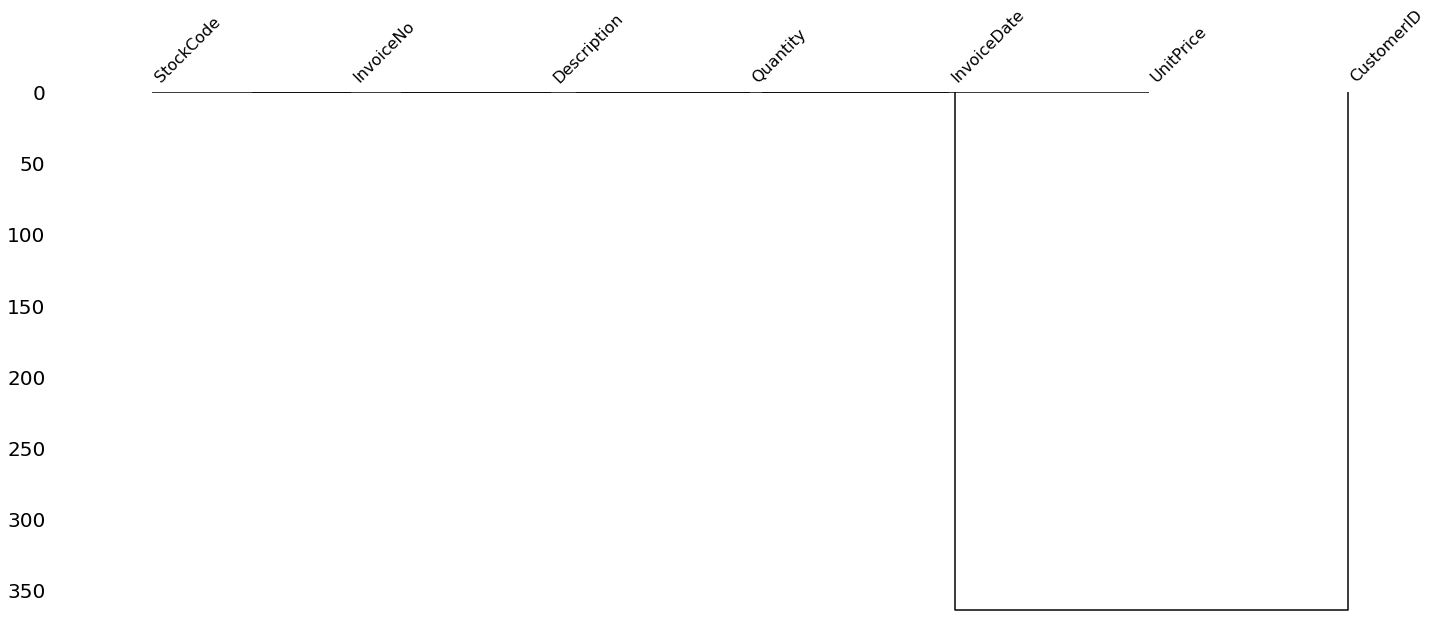

In [14]:
import missingno as msno
msno.dendrogram(ecomm)

In [15]:
# convert datetime from object
#ecomm['InvoiceDate']=pd.to_datetime(ecomm['InvoiceDate'])

#ecomm['CustomerID'] = ecomm.groupby('InvoiceDate')['CustomerID'].transform(lambda grp:grp.fillna(grp.mode()[0]))

In [16]:
display(ecomm.info())
display(ecomm.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524877 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524877 non-null  object 
 1   StockCode    524877 non-null  object 
 2   Description  524877 non-null  object 
 3   Quantity     524877 non-null  int64  
 4   InvoiceDate  524877 non-null  object 
 5   UnitPrice    524877 non-null  float64
 6   CustomerID   392692 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.0+ MB


None

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132185
dtype: int64

In [17]:
#making the column names in lowecase
ecomm.columns = ecomm.columns.str.lower()
ecomm['description'] = ecomm['description'].str.lower()
ecomm.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

        invoicedate  unitprice  customerid  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0



* Conclusion:
    
1. Missing percentage have been checked and missing values have not dropped without trying to fill up because most the missing values from 'customerid' column.Duplicated rows have been removed too.
    
1. To understsand easily, column names and values inside description column have been converted to lower cases.

In [18]:
ecomm=ecomm[ecomm.description.notnull()]

In [19]:
#create a new variable that indicates the total price of every purchase:

ecomm['revenue'] = ecomm['unitprice']*(ecomm['quantity'])
ecomm.sort_values('customerid')[:5]

invoiceno stockcode                     description  quantity  \
61619    541431     23166  medium ceramic top storage jar     74215   
14966    537626    84558A    3d dog picture playing cards        24   
14950    537626     22727       alarm clock bakelike red          4   
14951    537626     22728       alarm clock bakelike pink         4   
14952    537626     22729     alarm clock bakelike orange         4   

            invoicedate  unitprice  customerid  revenue  
61619  01/16/2019 10:01       1.04     12346.0  77183.6  
14966  12/05/2018 14:57       2.95     12347.0     70.8  
14950  12/05/2018 14:57       3.75     12347.0     15.0  
14951  12/05/2018 14:57       3.75     12347.0     15.0  
14952  12/05/2018 14:57       3.75     12347.0     15.0

In [20]:
# cleaning description text data

import nltk
stop = stopwords.words('english')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def remove_punctuation(description):
    """The function to remove punctuation"""
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [21]:
ecomm['lemmatize'] = ecomm['description'].apply(remove_punctuation)
ecomm['lemmatize'] = ecomm['description'].apply(remove_stopwords)
ecomm['lemmatize']=ecomm['description'].apply(lemmatize_text)

In [22]:
from collections import Counter
frequencies = Counter(word for sentence in ecomm['lemmatize'] for word in sentence)
for word, frequency in frequencies.most_common(100):  # get the 100 most frequent words
    print(word, frequency)

set 53069
of 52015
bag 51108
heart 42751
red 42199
retrospot 34124
vintage 32964
design 29753
pink 29299
box 26699
christmas 24587
cake 22193
jumbo 20724
metal 20396
white 20198
blue 18915
lunch 18007
3 17893
sign 16677
hanging 16452
card 16175
holder 15957
tin 15800
pack 15319
decoration 14330
paper 14135
t-light 14063
small 13945
6 12865
wooden 12435
polkadot 12228
bottle 11997
case 11872
glass 11528
tea 11519
rose 11450
12 11191
in 10959
and 10606
spaceboy 10570
hot 10293
water 9771
candle 9655
with 9519
large 9428
pantry 9403
home 9275
paisley 9149
4 8925
green 8880
ceramic 8757
regency 8613
doormat 8255
dolly 8221
girl 8213
mug 8079
skull 8067
mini 7970
ivory 7943
bunting 7881
bowl 7817
love 7793
cream 7760
party 7423
star 7359
assorted 7359
ribbon 7284
clock 7119
feltcraft 7041
black 7014
wicker 6976
garden 6815
kit 6748
woodland 6717
wrap 6678
frame 6618
fairy 6594
colour 6561
doily 6538
light 6344
drawer 6335
antique 6219
charlotte 6213
jar 6114
flower 6068
birthday 6048
childr

In [23]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [24]:
df_produits = pd.DataFrame(ecomm['description'].unique()).rename(columns = {0:'description'})
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Nb of keywords in variable 'description': 1526


In [25]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

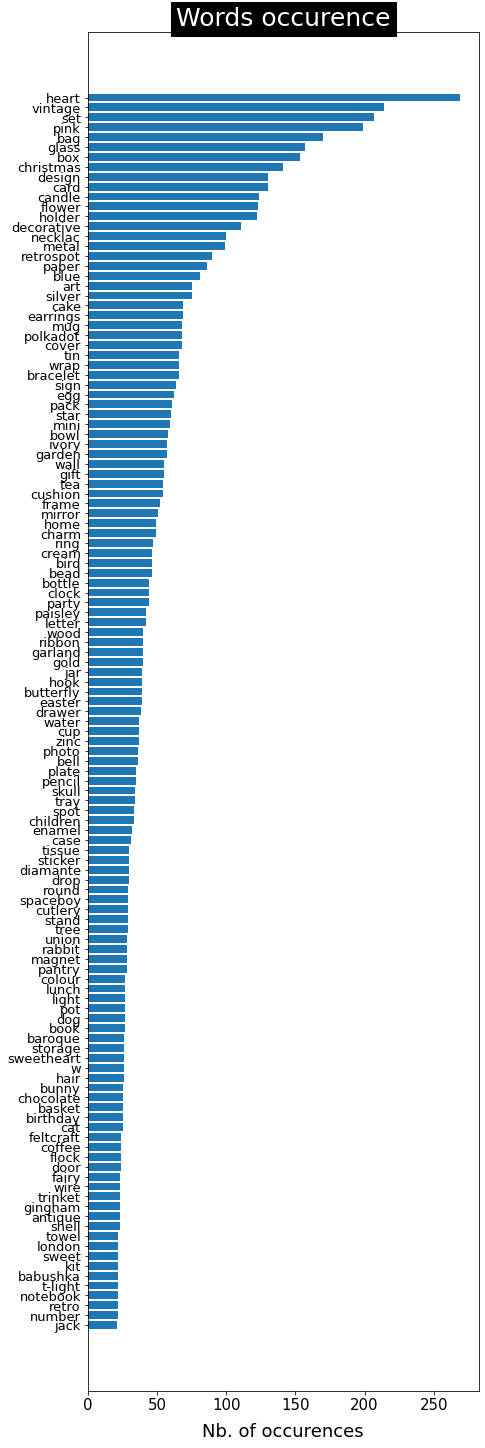

In [26]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [27]:
#Product categorization

def product_category(value):
         stemmed_list=[stemmer.stem(i) for i in value.split(' ')]
         if 'heart' in stemmed_list:
            return 'heart items'
         elif 'vintage' in  stemmed_list:
            return 'vintage items'
         elif 'set' in  stemmed_list:
            return 'set items'
         elif 'pink' in  stemmed_list:
            return 'pink colour products'
         elif 'bag' in  stemmed_list:
            return 'bag and baggage products'
         elif 'glass' in  stemmed_list:
            return 'glass items'
         elif 'boxt' in  stemmed_list:
            return 'box related items'
         elif 'christmas' in  stemmed_list:
            return 'christmas products'
         elif 'design' in  stemmed_list:
            return 'design products'
         elif 'card' in  stemmed_list:
            return 'card items'
         elif 'candle' in  stemmed_list:
            return 'candle products'
         elif 'flower' in  stemmed_list:
            return 'flower items'
         elif 'holder' in  stemmed_list:
            return 'holder products'
         elif 'decorative' in  stemmed_list:
            return 'decoration products'
         elif 'necklac' in  stemmed_list:
            return 'necklac products'
         elif 'metal' in  stemmed_list:
            return 'metal products'
         elif 'retrospot' in  stemmed_list:
            return 'retrospot items'
         elif 'paper' in  stemmed_list:
            return 'paper items'
         elif 'blue' in  stemmed_list:
            return 'blue colour products'
         elif 'art' in  stemmed_list:
            return 'art products'
         elif 'silver' in  stemmed_list:
            return 'silver colour products'
         elif 'cake' in  stemmed_list:
            return 'cake related products'
         elif 'earrings' in  stemmed_list:
            return 'earrings products'
         elif 'mug' in  stemmed_list:
            return 'mug products'
         elif 'polkador' in  stemmed_list:
            return 'polkadot related products'
         elif 'cover' in  stemmed_list:
            return 'cover products'
         elif 'tin' in  stemmed_list:
            return 'tin related products'
         elif 'wrap' in  stemmed_list:
            return 'wrap products'
         elif 'bracelet' in  stemmed_list:
            return 'bracelet products'
         elif 'star' in  stemmed_list:
            return 'start shaped products'
         elif 'ivory' in  stemmed_list:
            return 'ivory products'
         elif 'garden' in  stemmed_list:
            return 'garden products'
         elif 'cake' in  stemmed_list:
            return 'cake related products'
         elif 'tea' in  stemmed_list:
            return 'tea products'
         elif 'cushion' in  stemmed_list:
            return 'decoration products'
         elif 'frame' in  stemmed_list:
            return 'frame items'
         elif 'mirror' in  stemmed_list:
            return 'mirror products'
         elif 'wood' in  stemmed_list:
            return 'wood items'
         elif 'pencil' in  stemmed_list:
            return 'pencil products'
         elif 'children' in  stemmed_list:
            return 'children products'
         elif 'home' in  stemmed_list:
            return 'home items'
         elif 'bottle' in  stemmed_list:
            return 'bottle items'
         elif 'clock' in  stemmed_list:
            return 'clock items'
         elif 'party' in  stemmed_list:
            return 'party items'
         elif 'letter' in  stemmed_list:
            return 'letter products'
         elif 'gold' in  stemmed_list:
            return 'fashion items'
         elif 'water' in  stemmed_list:
            return 'water related products'
         elif 'skull' in stemmed_list:
            return 'skill items'
         elif 'lunch' in stemmed_list:
            return 'lunch items'
         elif 'spaceboy' in stemmed_list:
            return 'spaceboy items'
         elif 'light' in stemmed_list:
            return 'light items'
         elif 'choclate' in stemmed_list:
            return 'choclate items'
         elif 'door' in stemmed_list:
            return 'door items'
         elif 't-light' in stemmed_list:
            return 'light item'
         elif 'hand' in stemmed_list:
            return 'fashion items'
         elif 'ornament' in stemmed_list:
            return 'fashion item'
         elif 'bedroom' in stemmed_list:
            return 'bedroom items'
         elif 'box' in stemmed_list:
            return 'box items'
         elif 'love' in stemmed_list:
            return 'gift items'
         elif 'kitchen' in stemmed_list:
            return 'kitchen items'
         elif 'bicycle' in stemmed_list:
            return 'bicycle items'
         elif 'heart' in stemmed_list:
            return 'heart items'
         elif 'doormat' in stemmed_list:
            return 'doormat items'
         elif 'building'in stemmed_list:
            return 'building items'
         elif 'sticker' in stemmed_list:
            return 'sticker items'
         elif 'jigsaw' in stemmed_list:
            return 'jigsaw items'
         else:
            return 'uncategorized'
        
ecomm['product_category']= ecomm['description'].apply(product_category)
display(ecomm.head(20))

invoiceno stockcode                          description  quantity  \
0     536365    85123A   white hanging heart t-light holder         6   
1     536365     71053                  white metal lantern         6   
2     536365    84406B       cream cupid hearts coat hanger         8   
3     536365    84029G  knitted union flag hot water bottle         6   
4     536365    84029E       red woolly hottie white heart.         6   
5     536365     22752         set 7 babushka nesting boxes         2   
6     536365     21730    glass star frosted t-light holder         6   
7     536366     22633               hand warmer union jack         6   
8     536366     22632            hand warmer red polka dot         6   
9     536367     84879        assorted colour bird ornament        32   
10    536367     22745           poppy's playhouse bedroom          6   
11    536367     22748            poppy's playhouse kitchen         6   
12    536367     22749    feltcraft princess charlotte doll         8   
13    536367     22310              ivory knitted mug cosy          6   
14    536367     84969   box of 6 assorted colour teaspoons         6   
15    536367     22623        box of vintage jigsaw blocks          3   
16    536367     22622       box of vintage alphabet blocks         2   
17    536367     21754             home building block word         3   
18    536367     21755             love building block word         3   
19    536367     21777          recipe box with metal heart         4   

         invoicedate  unitprice  customerid  revenue  \
0   11/29/2018 08:26       2.55     17850.0    15.30   
1   11/29/2018 08:26       3.39     17850.0    20.34   
2   11/29/2018 08:26       2.75     17850.0    22.00   
3   11/29/2018 08:26       3.39     17850.0    20.34   
4   11/29/2018 08:26       3.39     17850.0    20.34   
5   11/29/2018 08:26       7.65     17850.0    15.30   
6   11/29/2018 08:26       4.25     17850.0    25.50   
7   11/29/2018 08:28       1.85     17850.0    11.10   
8   11/29/2018 08:28       1.85     17850.0    11.10   
9   11/29/2018 08:34       1.69     13047.0    54.08   
10  11/29/2018 08:34       2.10     13047.0    12.60   
11  11/29/2018 08:34       2.10     13047.0    12.60   
12  11/29/2018 08:34       3.75     13047.0    30.00   
13  11/29/2018 08:34       1.65     13047.0     9.90   
14  11/29/2018 08:34       4.25     13047.0    25.50   
15  11/29/2018 08:34       4.95     13047.0    14.85   
16  11/29/2018 08:34       9.95     13047.0    19.90   
17  11/29/2018 08:34       5.95     13047.0    17.85   
18  11/29/2018 08:34       5.95     13047.0    17.85   
19  11/29/2018 08:34       7.95     13047.0    31.80   

                                     lemmatize        product_category  
0     [white, hanging, heart, t-light, holder]             heart items  
1                      [white, metal, lantern]          metal products  
2          [cream, cupid, heart, coat, hanger]             heart items  
3   [knitted, union, flag, hot, water, bottle]  water related products  
4         [red, woolly, hottie, white, heart.]           uncategorized  
5             [set, 7, babushka, nesting, box]               set items  
6      [glass, star, frosted, t-light, holder]             glass items  
7                  [hand, warmer, union, jack]           fashion items  
8              [hand, warmer, red, polka, dot]           fashion items  
9           [assorted, colour, bird, ornament]            fashion item  
10               [poppy's, playhouse, bedroom]           bedroom items  
11               [poppy's, playhouse, kitchen]           kitchen items  
12      [feltcraft, princess, charlotte, doll]           uncategorized  
13                 [ivory, knitted, mug, cosy]            mug products  
14    [box, of, 6, assorted, colour, teaspoon]               box items  
15           [box, of, vintage, jigsaw, block]               box items  
16         [box, of, vintage, alphabet, block]     

In [28]:
ecomm['product_category'].value_counts()

uncategorized               121533
set items                    50129
bag and baggage products     44754
heart items                  42751
pink colour products         26397
retrospot items              19753
metal products               18728
design products              15048
card items                   14838
box items                    13383
blue colour products         11809
cake related products        10358
glass items                  10205
tin related products          8379
paper items                   7884
water related products        7527
holder products               6915
mug products                  5722
garden products               5524
clock items                   5499
frame items                   5375
doormat items                 4662
light items                   4298
flower items                  4228
wrap products                 4213
start shaped products         4202
tea products                  3758
lunch items                   3682
cover products      

In [29]:
# convert datetime from object
ecomm['invoicedate']=pd.to_datetime(ecomm['invoicedate'])

# Add a separate date and time column
ecomm['invoice_date'] = ecomm['invoicedate'].dt.date
ecomm['invoice_time'] = ecomm['invoicedate'].dt.time
ecomm['invoice_month'] = ecomm['invoicedate'].dt.month
ecomm['invoice_week'] = ecomm['invoicedate'].dt.week

display(ecomm.head(1))
display(ecomm.info(1))

import warnings
warnings.filterwarnings("ignore")

<ipython-input-29-d0bb796d0d28>:8: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



invoiceno stockcode                         description  quantity  \
0    536365    85123A  white hanging heart t-light holder         6   

          invoicedate  unitprice  customerid  revenue  \
0 2018-11-29 08:26:00       2.55     17850.0     15.3   

                                  lemmatize product_category invoice_date  \
0  [white, hanging, heart, t-light, holder]      heart items   2018-11-29   

  invoice_time  invoice_month  invoice_week  
0     08:26:00             11            48

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524877 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoiceno         524877 non-null  object        
 1   stockcode         524877 non-null  object        
 2   description       524877 non-null  object        
 3   quantity          524877 non-null  int64         
 4   invoicedate       524877 non-null  datetime64[ns]
 5   unitprice         524877 non-null  float64       
 6   customerid        392692 non-null  float64       
 7   revenue           524877 non-null  float64       
 8   lemmatize         524877 non-null  object        
 9   product_category  524877 non-null  object        
 10  invoice_date      524877 non-null  object        
 11  invoice_time      524877 non-null  object        
 12  invoice_month     524877 non-null  int64         
 13  invoice_week      524877 non-null  int64         
dtypes: d

None

In [30]:
ecomm = ecomm[['customerid','invoiceno','stockcode','quantity','unitprice','invoice_date','invoice_time','invoice_month','invoice_week','revenue','product_category','description']]

In [31]:
ecomm.head()

customerid invoiceno stockcode  quantity  unitprice invoice_date  \
0     17850.0    536365    85123A         6       2.55   2018-11-29   
1     17850.0    536365     71053         6       3.39   2018-11-29   
2     17850.0    536365    84406B         8       2.75   2018-11-29   
3     17850.0    536365    84029G         6       3.39   2018-11-29   
4     17850.0    536365    84029E         6       3.39   2018-11-29   

  invoice_time  invoice_month  invoice_week  revenue        product_category  \
0     08:26:00             11            48    15.30             heart items   
1     08:26:00             11            48    20.34          metal products   
2     08:26:00             11            48    22.00             heart items   
3     08:26:00             11            48    20.34  water related products   
4     08:26:00             11            48    20.34           uncategorized   

                           description  
0   white hanging heart t-light holder  
1                  white metal lantern  
2       cream cupid hearts coat hanger  
3  knitted union flag hot water bottle  
4       red woolly hottie white heart.

In [32]:
#writer=pd.ExcelWriter('pra_2.xlsx')
#ecomm.to_excel(writer,'PRA')
#writer.save()



* Conclusion:
    
1. invoicedate column have been converted to datetime type,and date and time have seperated for future analysis.
    

In [33]:
#findout total number of products,transaction and customers

pd.DataFrame([{'products': len(ecomm['stockcode'].value_counts()),    
               'transactions': len(ecomm['invoiceno'].value_counts()),
               'customers': len(ecomm['customerid'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

products  transactions  customers
quantity      3921         19959       4338



* Conclusion:
    
Using lemmatization technique, whole products have been categorized into 50 categories. Almost 77 % data have been categorized.This store have introduces almost 3921 products,19959 transactions and 4338 customers in the given time period.



## Exploratory data analysis

In [34]:
time_period_start_date = ecomm["invoice_date"].min()
time_period_end_date = ecomm["invoice_date"].max()
print('time_period_start_date:',time_period_start_date)
print('time_period_end_date:',time_period_end_date)

time_period_start_date: 2018-11-29
time_period_end_date: 2019-12-07




#### How many people purchase every day, week, and month?

In [35]:
#How many people order over the time period?

total_people = ecomm['customerid'].nunique()
print('total_people:', total_people)

#How many people order per day?

people_per_day = ecomm.groupby(['invoice_date']).agg({'customerid': ['nunique']})
people_per_day.columns = ['no_of_people']
print('Average people per day:',people_per_day.mean())

#--------------------------------------------------------
#How many people order per week?

people_per_week = ecomm.groupby(['invoice_week']).agg({'customerid': ['nunique']})
people_per_week.columns = ['no_of_people']
print('Average people per week:',people_per_week.mean())


#--------------------------------------------------------
#How many people order per month?

people_per_month = ecomm.groupby(['invoice_month']).agg({'customerid': ['nunique']})
people_per_month.columns = ['no_of_people']
print('Average people per month:',people_per_month.mean())


total_people: 4338
Average people per day: no_of_people    54.960656
dtype: float64
Average people per week: no_of_people    308.490196
dtype: float64
Average people per month: no_of_people    1064.916667
dtype: float64




* Conclusion:

1. 4338 number of people purchase over the given peiod.On average, 55 people purchase per day,308 people per week and 1064 people per month.
    
2. 1064 people per month, but 4338 number of people purchase throuhout the year.That means same people bought many times throuhout the year.



#### How many orders do cusotmer make during a given period of time?

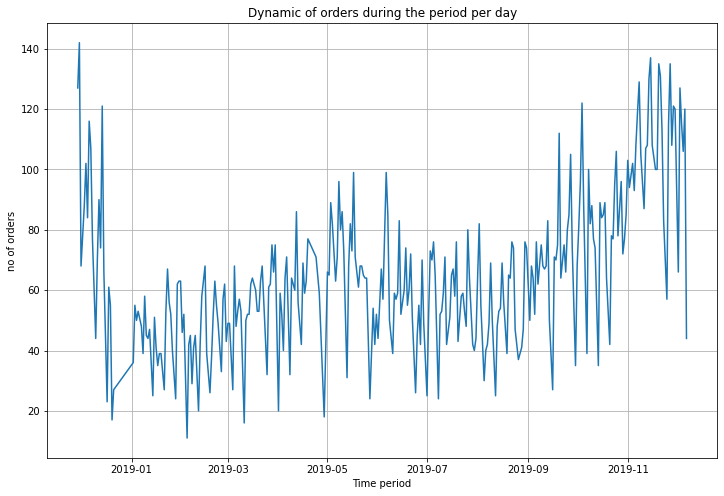

In [36]:
#How many orders do they make during a given period of time per day?
orders_df = ecomm.copy()

first_orders_day = orders_df.groupby('invoiceno').agg({'invoice_date': 'min'}).reset_index()
first_orders_day.columns = ['invoiceno', 'first_order_date']
orders_day = pd.merge(orders_df,first_orders_day, on='invoiceno')
cohorts_day = orders_day.groupby(['invoice_date']).agg({'invoiceno': 'nunique'}).reset_index()
cohorts_day.columns=['order_date_day','no_of_orders']

cohorts_day=cohorts_day.sort_values(by='order_date_day')
cohorts_day=cohorts_day.set_index('order_date_day')
plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(cohorts_day)
plt.title('Dynamic of orders during the period per day')
plt.xlabel("Time period")
plt.ylabel("no of orders")
plt.show()

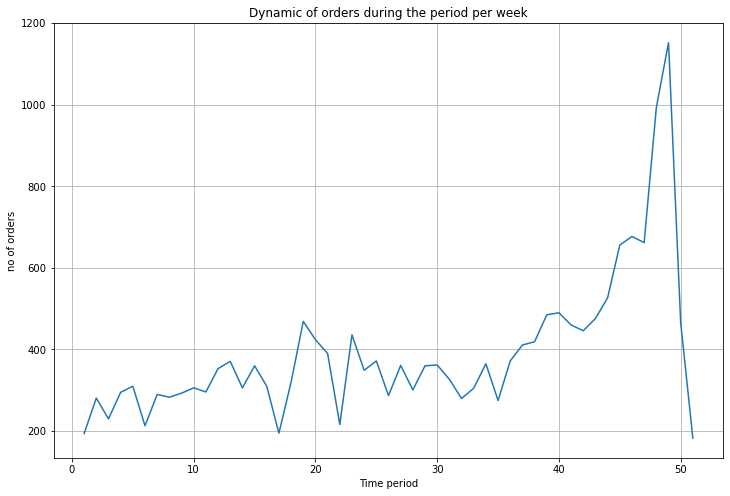

In [37]:
#How many orders do they make during a given period of time per week?

first_orders_week = orders_df.groupby('invoiceno').agg({'invoice_week': 'min'}).reset_index()
first_orders_week.columns = ['invoiceno', 'first_order_week']
orders_week = pd.merge(orders_df,first_orders_week, on='invoiceno')
cohorts_week = orders_week.groupby(['invoice_week']).agg({'invoiceno': 'nunique'}).reset_index()
cohorts_week.columns=['order_date_week','no_of_orders']

cohorts_week=cohorts_week.sort_values(by='order_date_week')
cohorts_week=cohorts_week.set_index('order_date_week')
plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(cohorts_week)
plt.title('Dynamic of orders during the period per week')
plt.xlabel("Time period")
plt.ylabel("no of orders")
plt.show()

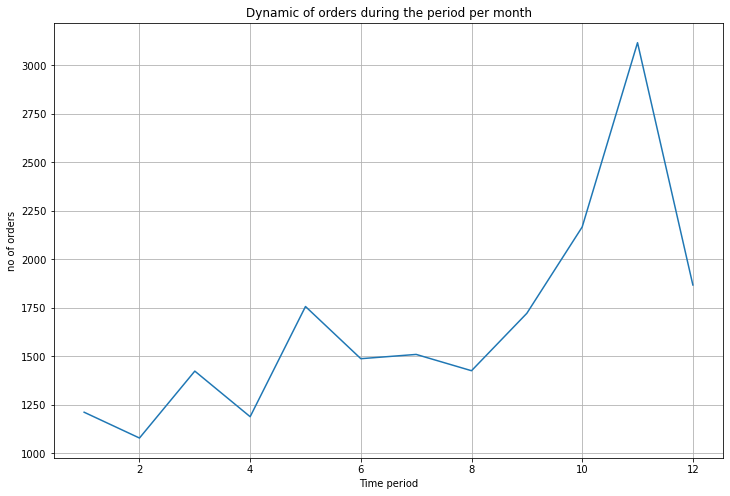

In [38]:
#How many orders do they make during a given period of time per month?

first_orders_month = orders_df.groupby('invoiceno').agg({'invoice_month': 'min'}).reset_index()
first_orders_month.columns = ['invoiceno', 'first_order_month']
orders_month = pd.merge(orders_df,first_orders_month, on='invoiceno')
cohorts_month = orders_month.groupby(['invoice_month']).agg({'invoiceno': 'nunique'}).reset_index()
cohorts_month.columns=['order_date_month','no_of_orders']

cohorts_month=cohorts_month.sort_values(by='order_date_month')
cohorts_month=cohorts_month.set_index('order_date_month')
plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(cohorts_month)
plt.title('Dynamic of orders during the period per month')
plt.xlabel("Time period")
plt.ylabel("no of orders")
plt.show()



In [39]:
#checking duplicates in dataframe
print('duplicate rows:',ecomm.duplicated().sum())

duplicate rows: 0


In [40]:
#Total sales by this given period?

total_sales = ecomm['revenue'].sum()
print('total_sales:',total_sales)


total_sales: 10631048.744000003


In [41]:
#Average sales per day?

sales_per_day = ecomm.groupby(['invoice_date']).agg({'revenue': ['sum']})
sales_per_day.columns = ['sales_per_day']
print('Average sales per day:',sales_per_day.mean())

Average sales per day: sales_per_day    34855.897521
dtype: float64


In [42]:
#Average sales per week?

sales_per_week = ecomm.groupby(['invoice_week']).agg({'revenue': ['sum']})
sales_per_week.columns = ['sales_per_week']
print('Average sales per week:',sales_per_week.mean())

Average sales per week: sales_per_week    208451.936157
dtype: float64


In [43]:
#Average sales per month?

sales_per_month = ecomm.groupby(['invoice_month']).agg({'revenue': ['sum']})
sales_per_month.columns = ['sales_per_month']
print('Average sales per month:',sales_per_month.mean())

Average sales per month: sales_per_month    885920.728667
dtype: float64




* Conclusion:
    
1. The company shared their sales record from 2018-11-29 to 2019-12-07 time peridod.In this period, company sells total 1,06,31,048 usd.And on average they did 34,855 usd sells per day,  2,08,451 usd per week, 8,85,920 usd per month.
    
2. From the dynamic graphs we can see that, company sells highest number of sells between 42-49 week number.In the month of november and beginning of december they sells highest comparing to all year around.May be this sells booast is for christmas festival.
    
3. Aveage sales per month close to 20 usd.But in december the aerage purchase size jumps a bit.



#### How much money do customer bring? (LTV)?

In [44]:
ecomm_cohorts = ecomm.copy()

ecomm_cohorts['invoice_month'] = ecomm_cohorts['invoice_date'].astype('datetime64[M]')
first_orders = ecomm_cohorts.groupby('customerid').agg({'invoice_month': 'min'}).reset_index()
first_orders.columns = ['customerid', 'first_order_month']
orders_ = pd.merge(ecomm_cohorts,first_orders, on='customerid')
cohorts = orders_.groupby(['invoice_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.columns=['invoice_month','no_of_orders']
cohorts=cohorts.sort_values(by='invoice_month')
cohorts=cohorts.set_index('invoice_month')

display(cohorts)
display(first_orders.head())
display(orders_.head())

no_of_orders
invoice_month              
2018-11-01        93390.060
2018-12-01       477032.670
2019-01-01       611551.160
2019-02-01       444922.800
2019-03-01       576281.930
2019-04-01       450844.541
2019-05-01       713856.340
2019-06-01       628733.190
2019-07-01       626866.581
2019-08-01       671563.400
2019-09-01       894607.702
2019-10-01      1091768.470
2019-11-01      1177531.080
2019-12-01       428258.970

customerid first_order_month
0     12346.0        2019-01-01
1     12347.0        2018-12-01
2     12348.0        2018-12-01
3     12349.0        2019-11-01
4     12350.0        2019-01-01

customerid invoiceno stockcode  quantity  unitprice invoice_date  \
0     17850.0    536365    85123A         6       2.55   2018-11-29   
1     17850.0    536365     71053         6       3.39   2018-11-29   
2     17850.0    536365    84406B         8       2.75   2018-11-29   
3     17850.0    536365    84029G         6       3.39   2018-11-29   
4     17850.0    536365    84029E         6       3.39   2018-11-29   

  invoice_time invoice_month  invoice_week  revenue        product_category  \
0     08:26:00    2018-11-01            48    15.30             heart items   
1     08:26:00    2018-11-01            48    20.34          metal products   
2     08:26:00    2018-11-01            48    22.00             heart items   
3     08:26:00    2018-11-01            48    20.34  water related products   
4     08:26:00    2018-11-01            48    20.34           uncategorized   

                           description first_order_month  
0   white hanging heart t-light holder        2018-11-01  
1                  white metal lantern        2018-11-01  
2       cream cupid hearts coat hanger        2018-11-01  
3  knitted union flag hot water bottle        2018-11-01  
4       red woolly hottie white heart.        2018-11-01

In [45]:
#How much money each customer bring? (LTV)?

cohort_sizes = first_orders.groupby('first_order_month').agg({'customerid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
display(cohort_sizes.head())
cohorts = orders_.groupby(['first_order_month','invoice_month']).agg({'revenue': 'sum'}).reset_index()
display(cohorts.head()) 
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
display(report.head())

margin_rate = .5 # Assuming 50% margin rate

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['invoice_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
display(report.head())

report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()
display(output.fillna(''))

ltv_201811 = output.loc['2018-11-01'].sum()
display(ltv_201811) 

first_order_month  n_buyers
0        2018-11-01       188
1        2018-12-01       697
2        2019-01-01       472
3        2019-02-01       368
4        2019-03-01       425

first_order_month invoice_month   revenue
0        2018-11-01    2018-11-01  93390.06
1        2018-11-01    2018-12-01  85374.84
2        2018-11-01    2019-01-01  70785.34
3        2018-11-01    2019-02-01  51493.64
4        2018-11-01    2019-03-01  77176.09

first_order_month  n_buyers invoice_month   revenue
0        2018-11-01       188    2018-11-01  93390.06
1        2018-11-01       188    2018-12-01  85374.84
2        2018-11-01       188    2019-01-01  70785.34
3        2018-11-01       188    2019-02-01  51493.64
4        2018-11-01       188    2019-03-01  77176.09

first_order_month  n_buyers invoice_month   revenue         gp  age
0        2018-11-01       188    2018-11-01  93390.06  46695.030    0
1        2018-11-01       188    2018-12-01  85374.84  42687.420    1
2        2018-11-01       188    2019-01-01  70785.34  35392.670    2
3        2018-11-01       188    2019-02-01  51493.64  25746.820    3
4        2018-11-01       188    2019-03-01  77176.09  38588.045    4

age                   0      1      2      3      4      5      6      7   \
first_order_month                                                           
2018-11-01         248.0  227.0  188.0  137.0  205.0  125.0  248.0  187.0   
2018-12-01         281.0  162.0  127.0  157.0  108.0  186.0  166.0  174.0   
2019-01-01         334.0   58.0   75.0   80.0  103.0   86.0   83.0   88.0   
2019-02-01         219.0   38.0   48.0   65.0   49.0   49.0   62.0   78.0   
2019-03-01         215.0   32.0   73.0   45.0   61.0   52.0   69.0   87.0   
2019-04-01         201.0   45.0   39.0   37.0   38.0   47.0   49.0   55.0   
2019-05-01         217.0   32.0   36.0   31.0   49.0   60.0   69.0  292.0   
2019-06-01         283.0   35.0   28.0   64.0   57.0   86.0   10.0          
2019-07-01         223.0   29.0   42.0   48.0   51.0   12.0                 
2019-08-01         207.0   55.0  109.0  141.0   38.0                        
2019-09-01         262.0   52.0   61.0   19.0                               
2019-10-01         239.0   62.0   13.0                                      
2019-11-01         214.0   10.0                                             
2019-12-01         402.0                                                    

age                   8      9      10     11     12     13  
first_order_month                                            
2018-11-01         182.0  232.0  255.0  330.0  407.0  111.0  
2018-12-01         199.0  243.0  257.0  267.0   72.0         
2019-01-01          78.0  134.0  139.0   22.0                
2019-02-01          71.0   87.0    7.0                       
2019-03-01          77.0   10.0                              
2019-04-01           7.0                                     
2019-05-01                                                   
2019-06-01                                                   
2019-07-01                                                   
2019-08-01                                                   
2019-09-01                                                   
2019-10-01                                                   
2019-11-01                                                   
2019-12-01

3082.0



* Conclusion:
  
On average, each customer from the first cohort brought USD 3082 in revenue over their thirteen-month liftetime assuming 50% margin rate and considering no marketing cost.Customer life time value is approx. 3082 USD.



#### What is the average sales size per month?

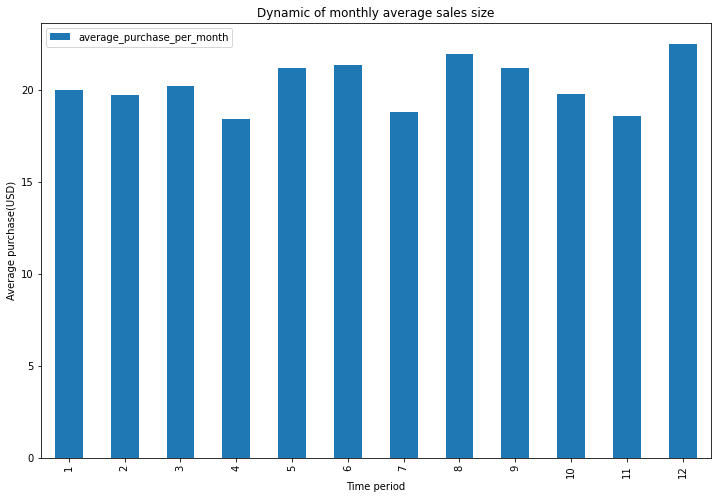

In [46]:
#What is the average sales size per month?


average_purchase_per_month = ecomm.groupby(['invoice_month']).agg({'revenue': ['mean']})
average_purchase_per_month.columns = ['average_purchase_per_month']


average_purchase_per_month.plot(y='average_purchase_per_month', kind='bar', figsize=(12,8))
plt.title('Dynamic of monthly average sales size')
plt.xlabel("Time period")
plt.ylabel("Average purchase(USD)")
plt.show()



* Conclusion:
  
On average, monthly purchase size is 20 USD all year around. In december, it jumps a bit.



#### Distribution of number of order per customer

customerid invoice_date invoiceno  revenue
0     17850.0   2018-11-29    536365    15.30
1     17850.0   2018-11-29    536365    20.34
2     17850.0   2018-11-29    536365    22.00
3     17850.0   2018-11-29    536365    20.34
4     17850.0   2018-11-29    536365    20.34

customerid
12346.0    1
12347.0    7
12348.0    4
12349.0    1
12350.0    1
Name: invoiceno, dtype: int64

65.58% of customers ordered more than once.
Average order: 4.272014753342554


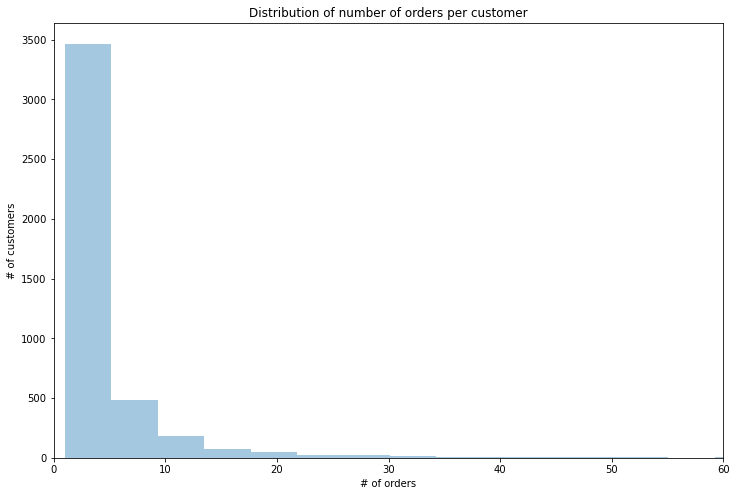

In [47]:
#Distribution of number of order per customer?

order_3 = ecomm.copy()
order_3 = order_3[['customerid','invoice_date','invoiceno','revenue']]
display(order_3.head())

order_3.describe().transpose()

n_orders = order_3.groupby(['customerid'])['invoiceno'].nunique()
display(n_orders.head())
mult_orders_perc = np.sum(n_orders > 1) / order_3['customerid'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

plt.figure(figsize=[12,8])
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',xlabel='# of orders', ylabel='# of customers')
ax.set_xlim([0, 60])
average_order = n_orders.mean()
print('Average order:',average_order)


import warnings
warnings.filterwarnings("ignore")



* Conclusion:
  
On average, 4 orders placed by each customer throughout the time period and 65.58% of customers ordered more than once.



#### Retention rate

In [48]:
cohort_purchase = ecomm.copy() 
cohort_purchase

customerid invoiceno stockcode  quantity  unitprice invoice_date  \
0          17850.0    536365    85123A         6       2.55   2018-11-29   
1          17850.0    536365     71053         6       3.39   2018-11-29   
2          17850.0    536365    84406B         8       2.75   2018-11-29   
3          17850.0    536365    84029G         6       3.39   2018-11-29   
4          17850.0    536365    84029E         6       3.39   2018-11-29   
...            ...       ...       ...       ...        ...          ...   
541904     12680.0    581587     22613        12       0.85   2019-12-07   
541905     12680.0    581587     22899         6       2.10   2019-12-07   
541906     12680.0    581587     23254         4       4.15   2019-12-07   
541907     12680.0    581587     23255         4       4.15   2019-12-07   
541908     12680.0    581587     22138         3       4.95   2019-12-07   

       invoice_time  invoice_month  invoice_week  revenue  \
0          08:26:00             11            48    15.30   
1          08:26:00             11            48    20.34   
2          08:26:00             11            48    22.00   
3          08:26:00             11            48    20.34   
4          08:26:00             11            48    20.34   
...             ...            ...           ...      ...   
541904     12:50:00             12            49    10.20   
541905     12:50:00             12            49    12.60   
541906     12:50:00             12            49    16.60   
541907     12:50:00             12            49    16.60   
541908     12:50:00             12            49    14.85   

              product_category                          description  
0                  heart items   white hanging heart t-light holder  
1               metal products                  white metal lantern  
2                  heart items       cream cupid hearts coat hanger  
3       water related products  knitted union flag hot water bottle  
4                uncategorized       red woolly hottie white heart.  
...                        ...                                  ...  
541904          spaceboy items          pack of 20 spaceboy napkins  
541905           uncategorized         children's apron dolly girl   
541906       children products        childrens cutlery dolly girl   
541907       children products      childrens cutlery circus parade  
541908               set items        baking set 9 piece retrospot   

[524877 rows x 12 columns]

In [49]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

cohort_purchase['InvoiceMonth'] = cohort_purchase['invoice_date'].apply(get_month)
grouping = cohort_purchase.groupby('customerid')['InvoiceMonth']
cohort_purchase['CohortMonth'] = grouping.transform('min')
cohort_purchase.head()


customerid invoiceno stockcode  quantity  unitprice invoice_date  \
0     17850.0    536365    85123A         6       2.55   2018-11-29   
1     17850.0    536365     71053         6       3.39   2018-11-29   
2     17850.0    536365    84406B         8       2.75   2018-11-29   
3     17850.0    536365    84029G         6       3.39   2018-11-29   
4     17850.0    536365    84029E         6       3.39   2018-11-29   

  invoice_time  invoice_month  invoice_week  revenue        product_category  \
0     08:26:00             11            48    15.30             heart items   
1     08:26:00             11            48    20.34          metal products   
2     08:26:00             11            48    22.00             heart items   
3     08:26:00             11            48    20.34  water related products   
4     08:26:00             11            48    20.34           uncategorized   

                           description InvoiceMonth CohortMonth  
0   white hanging heart t-light holder   2018-11-01  2018-11-01  
1                  white metal lantern   2018-11-01  2018-11-01  
2       cream cupid hearts coat hanger   2018-11-01  2018-11-01  
3  knitted union flag hot water bottle   2018-11-01  2018-11-01  
4       red woolly hottie white heart.   2018-11-01  2018-11-01

In [50]:
def get_date_int(df, column):    
    year = df[column].dt.year    
    month = df[column].dt.month    
    day = df[column].dt.day
    return year, month, day

In [51]:
invoice_year, invoice_month, _ = get_date_int(cohort_purchase, 'InvoiceMonth') 
cohort_year, cohort_month, _ = get_date_int(cohort_purchase, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
cohort_purchase['CohortIndex'] = years_diff * 12 + months_diff + 1
cohort_purchase.head()

customerid invoiceno stockcode  quantity  unitprice invoice_date  \
0     17850.0    536365    85123A         6       2.55   2018-11-29   
1     17850.0    536365     71053         6       3.39   2018-11-29   
2     17850.0    536365    84406B         8       2.75   2018-11-29   
3     17850.0    536365    84029G         6       3.39   2018-11-29   
4     17850.0    536365    84029E         6       3.39   2018-11-29   

  invoice_time  invoice_month  invoice_week  revenue        product_category  \
0     08:26:00             11            48    15.30             heart items   
1     08:26:00             11            48    20.34          metal products   
2     08:26:00             11            48    22.00             heart items   
3     08:26:00             11            48    20.34  water related products   
4     08:26:00             11            48    20.34           uncategorized   

                           description InvoiceMonth CohortMonth  CohortIndex  
0   white hanging heart t-light holder   2018-11-01  2018-11-01          1.0  
1                  white metal lantern   2018-11-01  2018-11-01          1.0  
2       cream cupid hearts coat hanger   2018-11-01  2018-11-01          1.0  
3  knitted union flag hot water bottle   2018-11-01  2018-11-01          1.0  
4       red woolly hottie white heart.   2018-11-01  2018-11-01          1.0

In [52]:
grouping = cohort_purchase.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['customerid'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='customerid')
display(cohort_counts)


CohortIndex   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   \
CohortMonth                                                                  
2018-11-01   188.0   71.0   69.0   62.0   68.0   69.0   74.0   72.0   62.0   
2018-12-01   697.0  267.0  220.0  269.0  238.0  278.0  243.0  246.0  248.0   
2019-01-01   472.0   95.0  126.0  107.0  153.0  132.0  121.0  120.0  137.0   
2019-02-01   368.0   62.0   63.0  106.0   95.0   87.0   85.0  101.0   95.0   
2019-03-01   425.0   62.0  112.0   83.0  101.0   75.0  107.0  107.0  112.0   
2019-04-01   288.0   61.0   58.0   60.0   58.0   63.0   63.0   77.0   15.0   
2019-05-01   297.0   60.0   49.0   49.0   61.0   71.0   85.0   16.0    NaN   
2019-06-01   230.0   43.0   38.0   58.0   57.0   74.0   15.0    NaN    NaN   
2019-07-01   203.0   36.0   39.0   45.0   53.0   18.0    NaN    NaN    NaN   
2019-08-01   164.0   29.0   44.0   48.0   13.0    NaN    NaN    NaN    NaN   
2019-09-01   289.0   68.0   91.0   31.0    NaN    NaN    NaN    NaN    NaN   
2019-10-01   381.0   92.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2019-11-01   305.0   19.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2019-12-01    31.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex   10.0   11.0   12.0   13.0  14.0  
CohortMonth                                    
2018-11-01    69.0   74.0   72.0   92.0  33.0  
2018-12-01   263.0  280.0  363.0  150.0   NaN  
2019-01-01   150.0  172.0   38.0    NaN   NaN  
2019-02-01   111.0   17.0    NaN    NaN   NaN  
2019-03-01    32.0    NaN    NaN    NaN   NaN  
2019-04-01     NaN    NaN    NaN    NaN   NaN  
2019-05-01     NaN    NaN    NaN    NaN   NaN  
2019-06-01     NaN    NaN    NaN    NaN   NaN  
2019-07-01     NaN    NaN    NaN    NaN   NaN  
2019-08-01     NaN    NaN    NaN    NaN   NaN  
2019-09-01     NaN    NaN    NaN    NaN   NaN  
2019-10-01     NaN    NaN    NaN    NaN   NaN  
2019-11-01     NaN    NaN    NaN    NaN   NaN  
2019-12-01     NaN    NaN    NaN    NaN   NaN

In [53]:
#Calculateretentionrate1.Storetherstcolumnascohort_sizesc
cohort_sizes = cohort_counts.iloc[:,0]

#Divideallvaluesinthecohort_countstablebycohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

#Reviewtheretentiontable

retention.round(3) * 100


CohortIndex   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
CohortMonth                                                                
2018-11-01   100.0  37.8  36.7  33.0  36.2  36.7  39.4  38.3  33.0  36.7   
2018-12-01   100.0  38.3  31.6  38.6  34.1  39.9  34.9  35.3  35.6  37.7   
2019-01-01   100.0  20.1  26.7  22.7  32.4  28.0  25.6  25.4  29.0  31.8   
2019-02-01   100.0  16.8  17.1  28.8  25.8  23.6  23.1  27.4  25.8  30.2   
2019-03-01   100.0  14.6  26.4  19.5  23.8  17.6  25.2  25.2  26.4   7.5   
2019-04-01   100.0  21.2  20.1  20.8  20.1  21.9  21.9  26.7   5.2   NaN   
2019-05-01   100.0  20.2  16.5  16.5  20.5  23.9  28.6   5.4   NaN   NaN   
2019-06-01   100.0  18.7  16.5  25.2  24.8  32.2   6.5   NaN   NaN   NaN   
2019-07-01   100.0  17.7  19.2  22.2  26.1   8.9   NaN   NaN   NaN   NaN   
2019-08-01   100.0  17.7  26.8  29.3   7.9   NaN   NaN   NaN   NaN   NaN   
2019-09-01   100.0  23.5  31.5  10.7   NaN   NaN   NaN   NaN   NaN   NaN   
2019-10-01   100.0  24.1   9.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-11-01   100.0   6.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-12-01   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex  11.0  12.0  13.0  14.0  
CohortMonth                          
2018-11-01   39.4  38.3  48.9  17.6  
2018-12-01   40.2  52.1  21.5   NaN  
2019-01-01   36.4   8.1   NaN   NaN  
2019-02-01    4.6   NaN   NaN   NaN  
2019-03-01    NaN   NaN   NaN   NaN  
2019-04-01    NaN   NaN   NaN   NaN  
2019-05-01    NaN   NaN   NaN   NaN  
2019-06-01    NaN   NaN   NaN   NaN  
2019-07-01    NaN   NaN   NaN   NaN  
2019-08-01    NaN   NaN   NaN   NaN  
2019-09-01    NaN   NaN   NaN   NaN  
2019-10-01    NaN   NaN   NaN   NaN  
2019-11-01    NaN   NaN   NaN   NaN  
2019-12-01    NaN   NaN   NaN   NaN

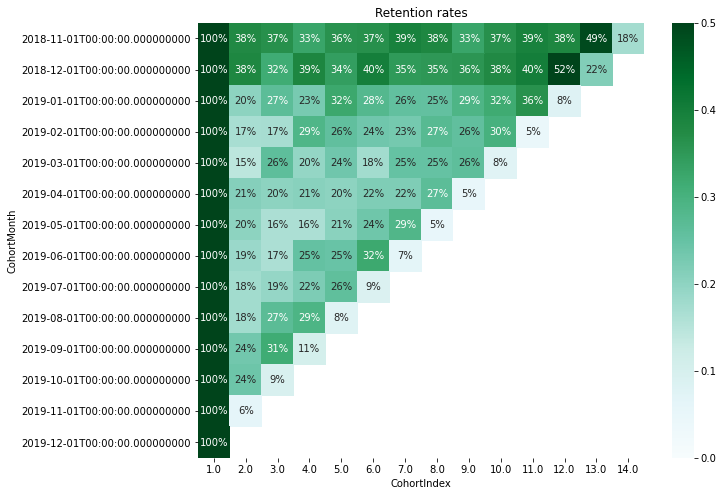

In [54]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.yticks( rotation='360')
plt.show()



* Conclusion:


In the image, we can see that there is a sharp drop-off in the second month (indexed as 1) already, on average around 62% of customers do not make any purchase in the second month. The twelve cohort (2018–11) seems to be an exception and performs surprisingly well as compared to the other ones. A year after the first purchase, there is a 18% retention. However, from data alone, that is very hard to accurately explain.Throughout the matrix, we can see fluctuations in retention over time. This might be caused by the characteristics of the business, where clients do periodic purchases, followed by periods of inactivity.



#### What products sold the most? Which are the most selling category?

In [55]:
#Top 10 products sell most

products_higest_sell = ecomm.pivot_table(index = 'description',values = 'quantity', aggfunc='sum').reset_index()
products_higest_sell.rename(columns = {'quantity':'count'}, inplace = True)
products_higest_sell.sort_values(by='count',ascending=False,inplace=True)
products_higest_sell =products_higest_sell.head(10)
fig = px.bar(products_higest_sell, x='description', y='count', 
             title='Products sold most',labels={
                     "description": "Products",
                     "count": "Number of times sold"})
fig.show() 


In [56]:
#Top 10 categories sell most

categories_higest_sell = ecomm.pivot_table(index = 'product_category',values = 'quantity', aggfunc='sum').reset_index()
categories_higest_sell.rename(columns = {'quantity':'count'}, inplace = True)
categories_higest_sell.sort_values(by='count',ascending=False,inplace=True)
categories_higest_sell = categories_higest_sell.head(10)
fig = px.bar(categories_higest_sell, x='product_category', y='count', 
             title='Categories sold most',labels={
                     "product_category": "Categories",
                     "count": "Number of times sold"})
fig.show() 




* Conclusion:

1. The above figures shows top 10 products and categories sold in this store.paper craft,medium ceramic top storage jar and world war 2 gliders asstd designs are the most popular products in this store.
    
2. As the products categories have been done manually using lemmatization algorithm, many products was hard to categorize with inproper name in the description.So uncategories took the first place.But except the first one, baga and baggage, heart items and set items.



#### Recommend the most appropriate time to display advertising to maximize the likelihood of customers buying the products?

In [57]:
#people purchase day-time

ecomm['invoice_hour'] = pd.to_datetime(ecomm['invoice_time'],format='%H:%M:%S').dt.hour
display(ecomm.head())
purchase_day_time = ecomm.groupby(['invoice_hour']).agg({'invoiceno': ['nunique']})
purchase_day_time.columns = ['no_of_sales']

#--------------------------------------

#people purchase week-day
ecomm['invoice_day'] = pd.to_datetime(ecomm['invoice_date']).dt.dayofweek
display(ecomm.head())
purchase_day_week = ecomm.groupby(['invoice_day']).agg({'invoiceno': ['nunique']})
purchase_day_week.columns = ['no_of_sales']


customerid invoiceno stockcode  quantity  unitprice invoice_date  \
0     17850.0    536365    85123A         6       2.55   2018-11-29   
1     17850.0    536365     71053         6       3.39   2018-11-29   
2     17850.0    536365    84406B         8       2.75   2018-11-29   
3     17850.0    536365    84029G         6       3.39   2018-11-29   
4     17850.0    536365    84029E         6       3.39   2018-11-29   

  invoice_time  invoice_month  invoice_week  revenue        product_category  \
0     08:26:00             11            48    15.30             heart items   
1     08:26:00             11            48    20.34          metal products   
2     08:26:00             11            48    22.00             heart items   
3     08:26:00             11            48    20.34  water related products   
4     08:26:00             11            48    20.34           uncategorized   

                           description  invoice_hour  
0   white hanging heart t-light holder             8  
1                  white metal lantern             8  
2       cream cupid hearts coat hanger             8  
3  knitted union flag hot water bottle             8  
4       red woolly hottie white heart.             8

customerid invoiceno stockcode  quantity  unitprice invoice_date  \
0     17850.0    536365    85123A         6       2.55   2018-11-29   
1     17850.0    536365     71053         6       3.39   2018-11-29   
2     17850.0    536365    84406B         8       2.75   2018-11-29   
3     17850.0    536365    84029G         6       3.39   2018-11-29   
4     17850.0    536365    84029E         6       3.39   2018-11-29   

  invoice_time  invoice_month  invoice_week  revenue        product_category  \
0     08:26:00             11            48    15.30             heart items   
1     08:26:00             11            48    20.34          metal products   
2     08:26:00             11            48    22.00             heart items   
3     08:26:00             11            48    20.34  water related products   
4     08:26:00             11            48    20.34           uncategorized   

                           description  invoice_hour  invoice_day  
0   white hanging heart t-light holder             8            3  
1                  white metal lantern             8            3  
2       cream cupid hearts coat hanger             8            3  
3  knitted union flag hot water bottle             8            3  
4       red woolly hottie white heart.             8            3

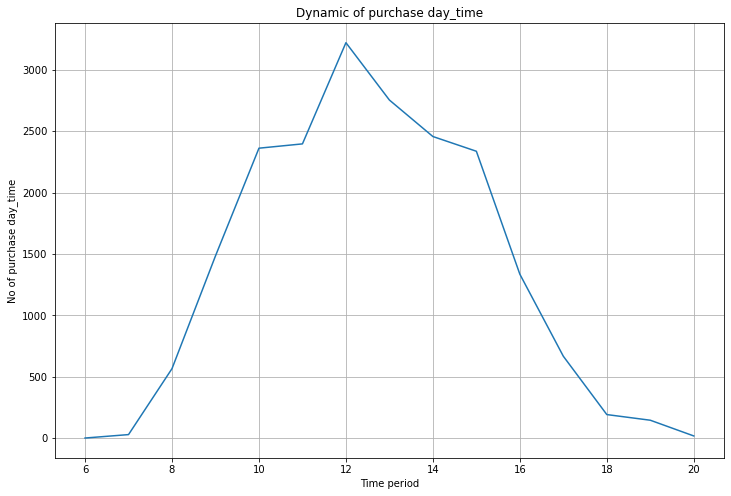

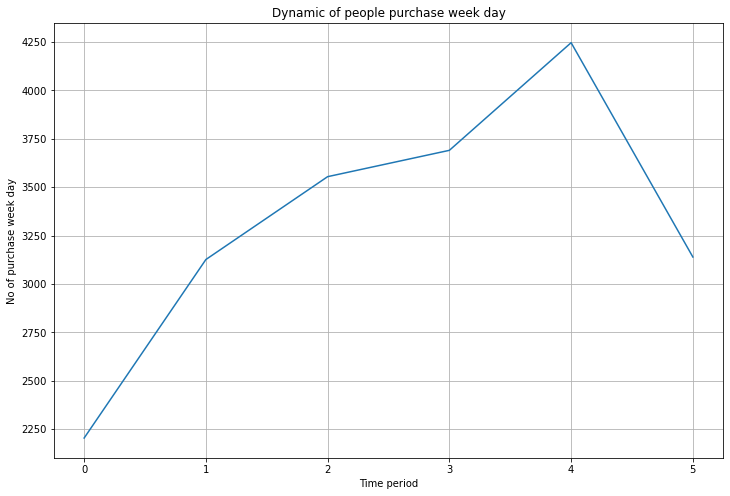

In [58]:
#Dynamic of purchase per day-time

plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(purchase_day_time['no_of_sales'],label='purchase day_time')
plt.title('Dynamic of purchase day_time')
plt.xlabel("Time period")
plt.ylabel("No of purchase day_time")
plt.show()

#----------------------------------------
#Dynamic of purchase week day

plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(purchase_day_week['no_of_sales'],label='purchase week day')
plt.title('Dynamic of people purchase week day')
plt.xlabel("Time period")
plt.ylabel("No of purchase week day")
plt.show()




* Conclusion:

For increase sales,marketing is the key.Nowadays, digital marketing got the more popularity for the covid 19 period.If this company want to introduce digital marketing in the future, they need smart campaigns based on customer behavior. I have some recommendation for them.
    
1. To optimise budget and reach maximum customers , digital marketing should be target based customer. From our analysis, we can see 12 pm is highest purchase time for this store.So, as of a few hours ago, 8am to 12 pm is the most productive time of day for conversion. As a result, the most frequent commercials should be placed during this time to boost sales.
    
2. On Friday ,Saturday,and sunday the number of campaigns should be limited. Consequently, more advertisements should be placed on wednesday and Thrusday.
    
3. At the beginning of this report we saw, Beginning og november to mid of december , this store sold the highhest number of products.So, the number of campaigns should be highest in this period rather than all other year around.



#### RFM (Recency, Frequency, Monetary) Analysis

In [59]:
display(ecomm["invoice_date"].min()) 
display(ecomm["invoice_date"].max())

PRESENT = dt.datetime(2019,12,8)

datetime.date(2018, 11, 29)

datetime.date(2019, 12, 7)

In [60]:

ecomm['invoice_date'] = pd.to_datetime(ecomm['invoice_date'])

In [61]:
rfm= ecomm.groupby('customerid').agg({'invoice_date': lambda x: (PRESENT - x.max()).days,
                                        'invoiceno': 'nunique',
                                        'revenue': 'sum'}).reset_index()

In [62]:
rfm.rename(columns={'invoice_date' : 'recency',
                   'invoiceno':'frequency',
                   'revenue':'monetary_value'},inplace=True)
rfm


customerid  recency  frequency  monetary_value
0        12346.0      326          1        77183.60
1        12347.0        3          7         4310.00
2        12348.0       76          4         1797.24
3        12349.0       19          1         1757.55
4        12350.0      311          1          334.40
...          ...      ...        ...             ...
4333     18280.0      278          1          180.60
4334     18281.0      181          1           80.82
4335     18282.0        8          2          178.05
4336     18283.0        4         16         2045.53
4337     18287.0       43          3         1837.28

[4338 rows x 4 columns]

In [63]:
for i in rfm.columns:
    if i=='customer_id':
        continue
    else:
        plot_data=[
             go.Histogram(x=rfm[i])
        ]
        plot_layout=go.Layout(title=i)
        fig = go.Figure(data=plot_data,layout =plot_layout)
        pyoff.iplot(fig)

In [64]:
#Building RFM segments
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['frequency'].rank(method='first'),q=4, labels = f_labels) # rank lable used because i got ValueError: Bin edges must be unique error
m_quartiles = pd.qcut(rfm['monetary_value'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

customerid  recency  frequency  monetary_value  R  F  M RFM_Segment  \
0     12346.0      326          1        77183.60  1  1  4   1.01.04.0   
1     12347.0        3          7         4310.00  4  4  4   4.04.04.0   
2     12348.0       76          4         1797.24  2  3  4   2.03.04.0   
3     12349.0       19          1         1757.55  3  1  4   3.01.04.0   
4     12350.0      311          1          334.40  1  1  2   1.01.02.0   

   RFM_Score  
0          6  
1         12  
2          9  
3          8  
4          4

In [65]:
rfm['RFM_Segment'].nunique()

62

In [66]:
rfm['RFM_Segment'].value_counts()

4.04.04.0    482
1.01.01.0    300
3.04.04.0    219
1.02.01.0    187
1.01.02.0    173
            ... 
4.01.03.0      3
3.01.04.0      2
4.04.01.0      2
1.04.01.0      1
4.01.04.0      1
Name: RFM_Segment, Length: 62, dtype: int64

In [67]:
def rfm_total(x):
    if x>=10 :
        return 'Whipped Cream'
    elif x>=9 and x<10:
        return 'Champion'
    elif x>=8 and x<9:
        return 'Loyal'
    elif x>=7 and x<8:
        return 'Potential'
    elif x>=6 and x<7:
        return 'Promising'
    elif x>=5 and x<6:
        return 'Needs attention'
    else: 
        return 'AT risk'
        

In [68]:
rfm['group'] = rfm['RFM_Score'].apply(rfm_total)
rfm

customerid  recency  frequency  monetary_value  R  F  M RFM_Segment  \
0        12346.0      326          1        77183.60  1  1  4   1.01.04.0   
1        12347.0        3          7         4310.00  4  4  4   4.04.04.0   
2        12348.0       76          4         1797.24  2  3  4   2.03.04.0   
3        12349.0       19          1         1757.55  3  1  4   3.01.04.0   
4        12350.0      311          1          334.40  1  1  2   1.01.02.0   
...          ...      ...        ...             ... .. .. ..         ...   
4333     18280.0      278          1          180.60  1  2  1   1.02.01.0   
4334     18281.0      181          1           80.82  1  2  1   1.02.01.0   
4335     18282.0        8          2          178.05  4  3  1   4.03.01.0   
4336     18283.0        4         16         2045.53  4  4  4   4.04.04.0   
4337     18287.0       43          3         1837.28  3  3  4   3.03.04.0   

      RFM_Score          group  
0             6      Promising  
1            12  Whipped Cream  
2             9       Champion  
3             8          Loyal  
4             4        AT risk  
...         ...            ...  
4333          4        AT risk  
4334          4        AT risk  
4335          8          Loyal  
4336         12  Whipped Cream  
4337         10  Whipped Cream  

[4338 rows x 10 columns]

In [69]:
#writing function for any parameter in our rfm table
def cluster_solution(parameter):
    score ={}
    for n_cluster in [2,3,4,5,6]:
        kmeans= KMeans(n_clusters=n_cluster).fit(
            rfm[[parameter]])
        
        silhouette_avg = silhouette_score(
            rfm[[parameter]],
            kmeans.labels_)
        score[n_cluster] =silhouette_avg
    return score    
        

In [70]:
dict_test=cluster_solution('recency')

In [71]:
dict_test

{2: 0.7395454618929667,
 3: 0.6751663983501319,
 4: 0.6196461095388472,
 5: 0.6195178358332956,
 6: 0.6081925513803895}

In [72]:
#building function for any parameter in our rfm table
def cluster_solution(parameter):
    score ={}
    for n_cluster in [2,3,4,5,6]:
        kmeans= KMeans(n_clusters=n_cluster).fit(
            rfm[[parameter]])
        
        silhouette_avg = silhouette_score(
            rfm[[parameter]],
            kmeans.labels_)
        score[n_cluster] =silhouette_avg
        needed_number =max(score,key=score.get)
    return needed_number    
        

In [73]:
#iterating over the columns and getting back the optimal number of clusters
for i in rfm[['recency','frequency','monetary_value']].columns:
    print(i,cluster_solution(i))

recency 2
frequency 2
monetary_value 2


In [74]:
rfm

customerid  recency  frequency  monetary_value  R  F  M RFM_Segment  \
0        12346.0      326          1        77183.60  1  1  4   1.01.04.0   
1        12347.0        3          7         4310.00  4  4  4   4.04.04.0   
2        12348.0       76          4         1797.24  2  3  4   2.03.04.0   
3        12349.0       19          1         1757.55  3  1  4   3.01.04.0   
4        12350.0      311          1          334.40  1  1  2   1.01.02.0   
...          ...      ...        ...             ... .. .. ..         ...   
4333     18280.0      278          1          180.60  1  2  1   1.02.01.0   
4334     18281.0      181          1           80.82  1  2  1   1.02.01.0   
4335     18282.0        8          2          178.05  4  3  1   4.03.01.0   
4336     18283.0        4         16         2045.53  4  4  4   4.04.04.0   
4337     18287.0       43          3         1837.28  3  3  4   3.03.04.0   

      RFM_Score          group  
0             6      Promising  
1            12  Whipped Cream  
2             9       Champion  
3             8          Loyal  
4             4        AT risk  
...         ...            ...  
4333          4        AT risk  
4334          4        AT risk  
4335          8          Loyal  
4336         12  Whipped Cream  
4337         10  Whipped Cream  

[4338 rows x 10 columns]

In [75]:
#writer=pd.ExcelWriter('rfm_2.xlsx')
#rfm.to_excel(writer,'RFM')
#writer.save()


* Conclusion:
    
Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.From RFM analysis dashboards, we can easily filter out the potential and best customers list.And according to the below table, we can take action to get back our potentioal customers.
    
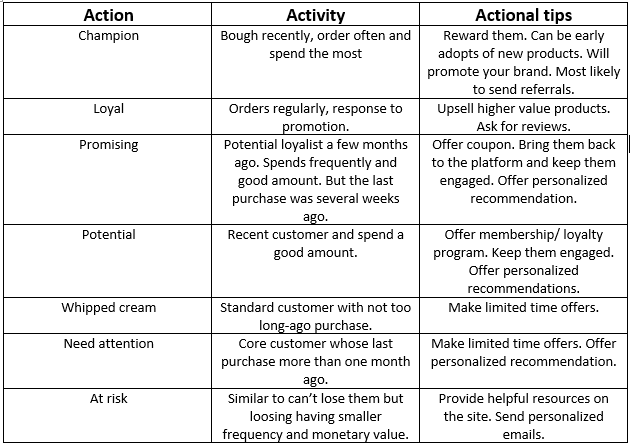

 RFM analysis Dashboards :<https://public.tableau.com/app/profile/rakibul.islam.sitab/viz/RFM_2_16255095219480/Dashboard1>



#### What products are most often sold together?

In [76]:
sold_most_together = ecomm[ecomm['invoiceno'].duplicated(keep=False)]


sold_most_together['Grouped'] = sold_most_together.groupby('invoiceno')['description'].transform(lambda x: ','.join(x))
sold_most_together_2 = sold_most_together[['invoiceno', 'Grouped']].drop_duplicates()

import warnings
warnings.filterwarnings("ignore")

In [77]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in sold_most_together_2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('key fob ', 'key fob ') 779
('key fob ', ' back door ') 574
('jumbo bag pink polkadot', 'jumbo bag red retrospot') 541
('key fob ', ' shed') 537
('green regency teacup and saucer', 'roses regency teacup and saucer ') 485
('key fob ', ' front  door ') 470
('jumbo shopper vintage red paisley', 'jumbo bag red retrospot') 465
('jumbo bag red retrospot', 'dotcom postage') 461
('jumbo storage bag suki', 'jumbo bag red retrospot') 453
('coffee', 'sugar') 442




* Conclusion:
    
Pair with key fob , key fob with back door and key fob with shed have been often sold together and most popular.This list could be provided to the machine learning engineer for building algorithm for the recommendation products in the web store.


    
## Testing Hypothesis


    
#### Average Unit price for top selling 20 products and low selling 20 products are the different.



**Testing:**
Let's compare the sample means for average unit price.
1. H0  - the sample means have no difference.
1. H1  - the sample means are different.
1. alpha - 0.05

In [78]:
#Finding top 20 selling products
#use same method to find top selling products,aggreation quantity sum up by products

top_20_selling_products = ecomm.pivot_table(index = 'description', values = 'quantity' ,aggfunc='sum').reset_index()
top_20_selling_products.rename(columns = {'quantity':'count'}, inplace = True)
top_20_selling_products.sort_values(by='count',ascending=False,inplace=True)
top_20_selling_products_1 = top_20_selling_products.head(20)
display(top_20_selling_products_1)

description  count
2386         paper craft , little birdie  80995
2052      medium ceramic top storage jar  78033
3933   world war 2 gliders asstd designs  54951
1815             jumbo bag red retrospot  48371
3843  white hanging heart t-light holder  37872
2680                      popcorn holder  36749
2336     pack of 72 retrospot cake cases  36396
227        assorted colour bird ornament  36362
2740                  rabbit night light  30739
2107             mini paint set vintage   26633
2302          pack of 12 london tissues   26119
2334  pack of 60 pink paisley cake cases  24820
3675     victorian glass hanging t-light  24275
235            assorted colours silk fan  23826
564                  brocade ring purse   23020
2764              red  harmonica in box   21903
1813             jumbo bag pink polkadot  21448
3406                small popcorn holder  20149
2380     paper chain kit 50's christmas   19329
2002             lunch bag red retrospot  19232

In [79]:
# collecting top_20 selling products unitprice


result_1 = pd.merge(top_20_selling_products_1,
                 ecomm[['description','unitprice']],
                 on='description')


In [80]:
result_1

description  count  unitprice
0         paper craft , little birdie  80995       2.08
1      medium ceramic top storage jar  78033       1.04
2      medium ceramic top storage jar  78033       1.04
3      medium ceramic top storage jar  78033       1.25
4      medium ceramic top storage jar  78033       1.25
...                               ...    ...        ...
18710         lunch bag red retrospot  19232       4.13
18711         lunch bag red retrospot  19232       1.65
18712         lunch bag red retrospot  19232       4.13
18713         lunch bag red retrospot  19232       1.65
18714         lunch bag red retrospot  19232       1.45

[18715 rows x 3 columns]

In [81]:
#Average Unit price for top selling 20 products 

top_20_products = result_1.pivot_table(index = 'description',values = 'unitprice' ,aggfunc='mean').reset_index()
top_20_products.rename(columns = {'unitprice':'average_unit_price'}, inplace = True)
top_20_products.sort_values(by='average_unit_price',ascending=False,inplace=True)


In [82]:
top_20_products

description  average_unit_price
11     paper chain kit 50's christmas             3.362331
18  white hanging heart t-light holder            3.218334
3              jumbo bag pink polkadot            2.598734
4              jumbo bag red retrospot            2.486197
14                  rabbit night light            2.386401
5              lunch bag red retrospot            2.131853
12         paper craft , little birdie            2.080000
0        assorted colour bird ornament            1.722575
17     victorian glass hanging t-light            1.644025
6       medium ceramic top storage jar            1.468480
15              red  harmonica in box             1.425572
16                small popcorn holder            1.075160
1            assorted colours silk fan            1.067765
13                      popcorn holder            1.020836
7              mini paint set vintage             0.785026
10     pack of 72 retrospot cake cases            0.761206
9   pack of 60 pink paisley cake cases            0.744693
8           pack of 12 london tissues             0.448260
2                  brocade ring purse             0.363402
19   world war 2 gliders asstd designs            0.320728

In [83]:
low_20_selling_products_price = top_20_selling_products.tail(20)

In [84]:
# collecting low_20 selling products unitprice

result_2 = pd.merge(low_20_selling_products_price,
                 ecomm[['description','unitprice']],
                 on='description')

In [85]:
result_2

description  count  unitprice
0     etched glass star tree decoration      1       1.25
1         vintage bead pink jewel stand      1       4.95
2       pack 4 flower/butterfly patches      1       1.25
3         blossom images scrap book set      1       4.95
4               filigree diamante chain      1      12.48
5        crochet lilac/red bear keyring      1       1.65
6       set of three vintage gift wraps      1       1.95
7        dusty pink christmas tree 30cm      1       1.25
8              blackchristmas tree 30cm      1       1.25
9     blue/nat shell necklace w pendant      1       5.95
10  set 10 cards christmas bauble 16954      1       3.33
11      set 12 colouring pencils doiley      1       0.65
12         green pendant shell necklace      1       5.09
13       fire polished glass neckl gold      1       5.95
14     black glass/shell/pearl necklace      1       9.15
15        set 10 cards 3 wise men 17107      1       2.91
16      country cottage  doorstop green      1       8.47
17    pink feather christmas decoration      1       2.51
18    marie antoienett trinket box gold      1      12.50
19      laser cut multi strand necklace      1      11.95

In [86]:
low_20_products = result_2.pivot_table(index = 'description',values = 'unitprice' ,aggfunc='mean').reset_index()
low_20_products.rename(columns = {'unitprice':'average_unit_price'}, inplace = True)
low_20_products.sort_values(by='average_unit_price',ascending=False,inplace=True)


In [87]:
low_20_products

description  average_unit_price
12    marie antoienett trinket box gold               12.50
8               filigree diamante chain               12.48
11      laser cut multi strand necklace               11.95
0      black glass/shell/pearl necklace                9.15
4       country cottage  doorstop green                8.47
3     blue/nat shell necklace w pendant                5.95
9        fire polished glass neckl gold                5.95
10         green pendant shell necklace                5.09
2         blossom images scrap book set                4.95
19        vintage bead pink jewel stand                4.95
16  set 10 cards christmas bauble 16954                3.33
15        set 10 cards 3 wise men 17107                2.91
14    pink feather christmas decoration                2.51
18      set of three vintage gift wraps                1.95
5        crochet lilac/red bear keyring                1.65
7     etched glass star tree decoration                1.25
6        dusty pink christmas tree 30cm                1.25
1              blackchristmas tree 30cm                1.25
13      pack 4 flower/butterfly patches                1.25
17      set 12 colouring pencils doiley                0.65

In [88]:
top20_Avg_unit_price=top_20_products['average_unit_price']
low20_Avg_unit_price=low_20_products['average_unit_price']


alpha = .05   #critical statistical significance level

results = st.ttest_ind(
        top20_Avg_unit_price, 
        low20_Avg_unit_price,equal_var = False) 

print('p-value:',results.pvalue) 

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 0.0011995528376850639
We reject the null hypothesis




* Conclusion:

The analysis suggested that Average unit price for the top20 products and low20 products are different.In both cases, a significance level of 0.05 selected which concludes a 5% risk of a difference exists when there is no actual difference. Lower significance levels indicate that i require stronger evidence before i reject the null hypothesis.



### Overall Conclusion:
    
1. There have one dataframe ecomm. The ecomm data set has 541909 rows and 7 columns.
    
1. There have missing values observed in the 'Description' and 'CustomerID' columns and 5268 numbers of duplicated values have been found.
    
1. Missing percentage have been checked and missing values have dropped without trying to fill up because most the missing values from 'customerid' column.Duplicated rows have been removed too.
    
1. To understsand easily, column names and values inside description column have been converted to lower cases.
    
1. Using lemmatization technique, whole products have been categorized into 50 categories. Almost 77 % data have been categorized.This store have introduces almost 3921 products,19959 transactions and 4338 customers in the given time period.
    
1. 4338 number of people purchase over the given peiod.On average, 55 people purchase per day,308 people per week and 1064 people per month.
    
1. 1064 people per month, but 4338 number of people purchase throuhout the year.That means same people bought many times throuhout the year.
    
1. The company shared their sales record from 2018-11-29 to 2019-12-07 time peridod.In this period, company sells total 1,06,31,048 usd.And on average they did 34,855 usd sells per day,  2,08,451 usd per week, 8,85,920 usd per month.
    
1. From the dynamic graphs we can see that, company sells highest number of sells between 42-49 week number.In the month of november and beginning of december they sells highest comparing to all year around.May be this sells booast is for christmas festival.
    
1. Aveage sales per month close to 20 usd.But in december the aerage purchase size jumps a bit.

1. From the dynamic graphs we can see that, company sells highest number of sells between 42-49 week number.In the month of november and beginning of december they sells highest comparing to all year around.May be this sells booast is for christmas festival.
    
1. On average, each customer from the first cohort brought USD 3082 in revenue over their thirteen-month liftetime assuming 50% margin rate and considering no marketing cost.Customer life time value is approx. 3082 USD.
    
1. On average, monthly purchase size is 20 USD all year around. In december, it jumps a bit.
    
1. On average, 4 orders placed by each customer throughout the time period and 65.58% of customers ordered more than once.
    
1. From purchase retention matrix, we can see that there is a sharp drop-off in the second month (indexed as 1) already, on average around 62% of customers do not make any purchase in the second month. The twelve cohort (2018–11) seems to be an exception and performs surprisingly well as compared to the other ones. A year after the first purchase, there is a 18% retention. However, from data alone, that is very hard to accurately explain.Throughout the matrix, we can see fluctuations in retention over time. This might be caused by the characteristics of the business, where clients do periodic purchases, followed by periods of inactivity.
    
1. The above figures shows top 10 products and categories sold in this store.paper craft,medium ceramic top storage jar and world war 2 gliders asstd designs are the most popular products in this store.
    
1. As the products categories have been done manually using lemmatization algorithm, many products was hard to categorize with inproper name in the description.So uncategories took the first place.But except the first one, baga and baggage, heart items and set items.
    
1. From RFM analysis, we have found out our top/ best customer list.
    
1. Pair with key fob , key fob with back door and key fob with shed have been often sold together and most popular.This list could be provided to the machine learning engineer for building algorithm for the recommendation products in the web store.
    
1. The analysis suggested that Average unit price for the top20 products and low20 products are different.In both cases, a significance level of 0.05 selected which concludes a 5% risk of a difference exists when there is no actual difference. Lower significance levels indicate that i require stronger evidence before i reject the null hypothesis.



### Future recommendation:
    
For increase sales,marketing is the key.Nowadays, digital marketing got the more popularity for the covid 19 period.If this company want to introduce digital marketing in the future, they need smart campaigns based on customer behavior. I have some recommendation for them.
    
1. To optimise budget and reach maximum customers , digital marketing should be target based customer. From our analysis, we can see 12 pm is highest purchase time for this store.So, as of a few hours ago, 8am to 12 pm is the most productive time of day for conversion. As a result, the most frequent commercials should be placed during this time to boost sales.
    
2. On Friday ,Saturday,and sunday the number of campaigns should be limited. Consequently, more advertisements should be placed on wednesday and Thrusday.
    
3. At the beginning of this report we saw, Beginning og november to mid of december , this store sold the highhest number of products.So, the number of campaigns should be higher in this period rather than all other year around.



Presentation: <https://drive.google.com/file/d/13MnM-UY9F0XkSrP109Vx3F5f6ykFEaK3/view?usp=sharing>
    
KPI Dashboards : <https://public.tableau.com/app/profile/rakibul.islam.sitab/viz/PRA-2/Dashboard1>
    

